<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/Reg_lin_AND_Reg_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SEED = 1255
samples = 50

In [3]:
np.random.seed(SEED)

In [4]:
def generate_data(max_samples):

  X = np.array(range(max_samples))

  _noise = np.random.uniform(-10,20,size=max_samples)

  y = 3.5*X + _noise

  return X, y

In [5]:
X, y = generate_data(max_samples=samples)

data = np.vstack([X, y]).T
data

array([[  0.        ,  -2.51094513],
       [  1.        ,   0.59512034],
       [  2.        ,   6.86260834],
       [  3.        ,  11.52995674],
       [  4.        ,   7.24897316],
       [  5.        ,  15.82492027],
       [  6.        ,  17.8083033 ],
       [  7.        ,  16.07182313],
       [  8.        ,  40.71357691],
       [  9.        ,  40.95663641],
       [ 10.        ,  44.5000317 ],
       [ 11.        ,  29.74497691],
       [ 12.        ,  43.99113857],
       [ 13.        ,  65.09174352],
       [ 14.        ,  62.98828234],
       [ 15.        ,  46.40400609],
       [ 16.        ,  72.14028548],
       [ 17.        ,  59.05628638],
       [ 18.        ,  65.41704351],
       [ 19.        ,  70.46214079],
       [ 20.        ,  67.31128068],
       [ 21.        ,  71.70507253],
       [ 22.        ,  68.69779252],
       [ 23.        ,  92.14350823],
       [ 24.        ,  91.31969739],
       [ 25.        ,  94.95669736],
       [ 26.        ,  91.91262625],
 

In [6]:
df = pd.DataFrame(data, columns=['X', 'y'])

df.head()

,X,y
0,0.0,-2.510945
1,1.0,0.595120
2,2.0,6.862608
3,3.0,11.529957
4,4.0,7.248973


In [7]:
X = df.X
y = df.y

In [8]:
X.head(3), y.head(3)

(0    0.0
 1    1.0
 2    2.0
 Name: X, dtype: float64, 0   -2.510945
 1    0.595120
 2    6.862608
 Name: y, dtype: float64)

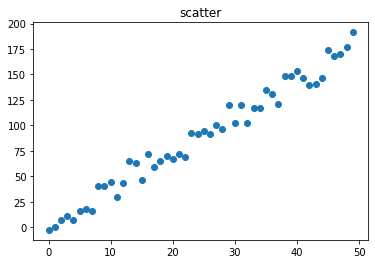

In [9]:
plt.title('scatter')
plt.scatter(X, y)
plt.show()

In [10]:
indices = list(range(samples))

indices

np.random.shuffle(indices)

indices

X = X[indices]

y = y[indices]

In [11]:
X_train = X[:int(0.70*samples)]
y_train = y[:int(0.70*samples)]

X_val = X[int(0.70*samples):int(0.85*samples)]
y_val = y[int(0.70*samples):int(0.85*samples)]

X_test = X[int(0.85*samples):]
y_test = y[int(0.85*samples):]

print(X_train.shape, y_train.shape)
print()
print(X_val.shape, y_val.shape)
print()
print(X_test.shape, y_test.shape)

(35,) (35,)

(7,) (7,)

(8,) (8,)


In [12]:
def standardize_data(data, mean, std):

  return (data - mean) / std

In [13]:
X_mean = np.mean(X_train)

y_mean = np.mean(y_train)

X_std = np.std(X_train)

y_std = np.std(y_train)

In [14]:
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)

X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)

X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [15]:
print(np.mean(X_train), np.std(y_train))
print()
print(np.mean(X_val), np.std(y_val))
print()
print(np.mean(X_test), np.std(y_test))

-1.9032394707859827e-17 1.0

-0.0039712254946328174 0.90039669798834

-0.6108241213932052 1.0002522185816491


In [16]:
X_train = X_train[:,np.newaxis]
y_train = y_train[:,np.newaxis]

X_val = X_val[:,np.newaxis]
y_val = y_val[:,np.newaxis]

X_test = X_test[:,np.newaxis]
y_test = y_test[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be rem

In [17]:
INPUT  = X_train.shape[1]
OUTPUT = y_train.shape[1]

INPUT

1

In [18]:
W = 0.01*np.random.rand(INPUT, OUTPUT)

b = np.zeros((1,1))

print(W.shape, b.shape)

(1, 1) (1, 1)


In [19]:
# fordward pass (Nx1) X (1X1) = (Nx1)

y_pred = np.dot(X_train, W) + b

y_pred.shape

(35, 1)

In [20]:
# loss

N = len(y_train)

loss = (1/N)*np.sum((y_train - y_pred)** 2)

loss, loss.shape

(0.9838253192355723, ())

In [21]:
# Backpropagation

dW = (-2/N)*np.sum((y_train - y_pred) * X_train)

db = (-2/N)*np.sum(y_train - y_pred) * 1

In [22]:
dW

-1.9578721257339817

In [23]:
# Update weights

lr = 1e-1

W += -lr * dW

b += -lr * db

In [24]:
# Automatically

W = np.random.rand(INPUT, OUTPUT)
b = np.zeros((1,))

epochs = 100

N = len(X_train)

for i in range(epochs):

  # fordward pass
  y_pred = np.dot(X_train, W) + b

  # loss
  loss = (1/N) * np.sum((y_train - y_pred) ** 2)

  # show proccess
  if i % 10 == 0:

    print(f'\t\tepoch: {i}\t\tloss: {loss:.3f}')

  # backpropagation

  dW = -(2/N)*np.sum((y_train-y_pred) * X_train)
  db = -(2/N)*np.sum((y_train-y_pred) * 1)

  # update

  lr = 1e-2

  W += -lr * dW
  b += -lr * db

		epoch: 0		loss: 0.096
		epoch: 10		loss: 0.072
		epoch: 20		loss: 0.057
		epoch: 30		loss: 0.046
		epoch: 40		loss: 0.039
		epoch: 50		loss: 0.035
		epoch: 60		loss: 0.032
		epoch: 70		loss: 0.030
		epoch: 80		loss: 0.028
		epoch: 90		loss: 0.027


In [25]:
# predictions
pred_train = W * X_train + b
pred_test = W * X_test + b

In [26]:
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)

print(f'accuracy train: {train_mse:.3f}')
print(f'accuracy test: {test_mse:.3f}')


accuracy train: 0.027
accuracy test: 0.025


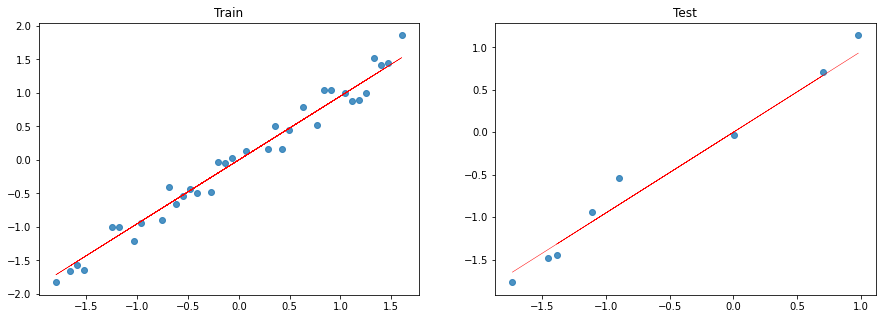

In [27]:
# graph

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Train')
plt.scatter(X_train, y_train, alpha=.8)
plt.plot(X_train, pred_train, label='train pred', color='red', linewidth=0.5)

plt.subplot(1,2,2)
plt.title('Test')
plt.scatter(X_test, y_test, alpha=.8)
plt.plot(X_test, pred_test, label='test pred', color='red', linewidth=0.5)

plt.show()

In [28]:
# unscaled weights

W_unscaled = W*(y_std/X_std)

b_unscaled = b*y_std + y_mean - np.sum(W_unscaled*X_mean)


print(f'{W_unscaled[0,0]:.3f}X + {b_unscaled[0]:.3f}')

3.479X + 3.507


In [29]:
# with Pytorch

import torch

In [30]:
torch.manual_seed(1235)

In [31]:
X = X[:, np.newaxis]
y = y[:, np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.7)

X_test,  X_val, y_test, y_val = train_test_split(X_, y_, train_size=0.5)

In [33]:
X_train.shape, X_test.shape, X_val.shape

((35, 1), (7, 1), (8, 1))

In [34]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [35]:
X_train = X_scaler.transform(X_train)
y_train = X_scaler.transform(y_train)

X_test = X_scaler.transform(X_test)
y_test = X_scaler.transform(y_test)

X_val = X_scaler.transform(X_val)
y_val = X_scaler.transform(y_val)

In [36]:
np.mean(X_test), np.std(X_test, axis=0)

(0.035450796299751404, array([0.66468419]))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(1234)

In [7]:
data = pd.read_csv(f"https://raw.githubusercontent.com/GokuMohandas/madewithml/main/datasets/tumors.csv", header=0)

data.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


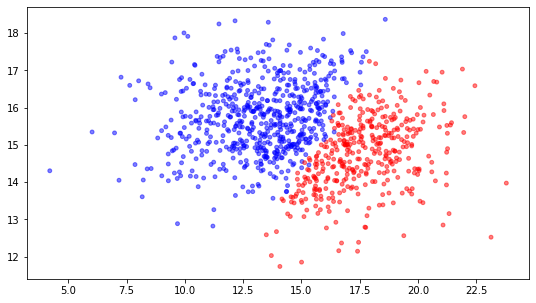

In [21]:
plt.figure(figsize=(9,5))

colors = {'benign': 'red', 'malignant': 'blue'}
plt.scatter(data.iloc[:,0], data.iloc[:,1], cmap='Blues', c=[colors[_y] for _y in data['tumor_class']], s=15, alpha=0.5)
plt.show()

In [26]:
X = data.iloc[:,0:2].values

y = data.iloc[:, 2].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.7)

X_test, X_val, y_test, y_val = train_test_split(X_, y_, train_size=0.5)

In [29]:
print(X_test.shape, X_val.shape, X_train.shape)

(150, 2) (150, 2) (700, 2)


In [32]:
data['tumor_class'].value_counts()

malignant    611
benign       389
Name: tumor_class, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y)

y = le.transform(y)

In [40]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [51]:
counts = np.bincount(y_train)

class_weights = {i: 1.0 / j for i, j in enumerate(counts)}

class_weights

{0: 0.003787878787878788, 1: 0.0022935779816513763}

In [55]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X_val = X_scaler.transform(X_val)

In [57]:
print(np.mean(X_val[:,0]), np.std(X_val))
print(np.mean(X_test[:,0]), np.std(X_test))

0.13983282301530492 1.0260233817085724
0.12190403314053033 0.9588218543832464


In [68]:
INPUT_DIM = X_train.shape[1]

NUM_CLASS = len(np.bincount(y))

NUM_CLASS

2

In [70]:
W = 0.01 * np.random.randn(INPUT_DIM, NUM_CLASS)

b = np.zeros((1, NUM_CLASS))

print(W.shape, b.shape)

(2, 2) (1, 2)


In [72]:
logits = np.dot(X_train, W) + b

print(logits.shape)
print(logits[0:1,:])

(700, 2)
[[0.00403903 0.00079806]]


In [89]:
# Normalization via softmax to obtain class probabilities
exp_logits = np.exp(logits)

y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True) # axis 1 sum rows

print(y_hat.shape)
print(y_hat[0])

(700, 2)
[0.50081024 0.49918976]


In [121]:
# loss

correct_class_logprob = -np.log(y_hat[range(len(y_hat)), y_train])

loss = np.sum(correct_class_logprob) / len(y_train)


print(f'Loss: {loss:.2f}')

Loss: 0.69


In [137]:
# Backpropagation

dscores = y_hat

dscores[range(len(y_train)), y_train] -= 1

dscores /= len(y_train)

dW = np.dot(X_train.T, dscores)

db = np.sum(dscores, axis=0, keepdims=True)

In [177]:
W = 0.01 * np.random.rand(INPUT_DIM, NUM_CLASS)
b = np.zeros((1, NUM_CLASS))

epochs =  70

In [178]:
learning_rate = 0.1

In [179]:
for i in range(epochs):

  # forward
  logits = np.dot(X_train, W) + b

  # softmax
  exp_logits = np.exp(logits)
  y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

  # loss
  correct_class_logprob = -np.log(y_hat[range(len(y_hat)), y_train])
  loss = np.sum(correct_class_logprob) / len(y_train)

  # show proccess
  if i % 10 == 0:
    # accuracy
    y_pred = np.argmax(logits, axis=1)
    accuracy = np.mean(np.equal(y_train, y_pred))

    print(f'epoch: {i}\tloss: {loss:.3f}\taccuracy: {accuracy:3f}')

  # backpropagation
  dscores = y_hat
  dscores[range(len(y_hat)), y_train] -= 1
  dscores /= len(y_train)

  dW = np.dot(X_train.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  # update weights
  W += -learning_rate*dW
  b += -learning_rate*db

epoch: 0	loss: 0.693	accuracy: 0.571429
epoch: 10	loss: 0.453	accuracy: 0.974286
epoch: 20	loss: 0.356	accuracy: 0.974286
epoch: 30	loss: 0.303	accuracy: 0.974286
epoch: 40	loss: 0.269	accuracy: 0.974286
epoch: 50	loss: 0.245	accuracy: 0.974286
epoch: 60	loss: 0.227	accuracy: 0.974286


In [180]:
# evaluate
class LogisticRegrssionFromScratch():

  def predict(self, x):

    logits = np.dot(x, W) + b
    exp_logits = np.exp(logits)
    y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    return y_hat

In [181]:
model = LogisticRegrssionFromScratch()

logits_train = model.predict(X_train)
pred_train = np.argmax(logits_train, axis=1)
logits_test = model.predict(X_test)
pred_test = np.argmax(logits_test, axis=1)

In [182]:
train_acc = np.mean(np.equal(y_train, pred_train))
test_acc = np.mean(np.equal(y_test, pred_test))

In [183]:
print(f'Accuracy train: {train_acc:.3f}\nAccuracy test: {test_acc:.3f}')

Accuracy train: 0.974
Accuracy test: 0.967


(11.636216826926082, 18.47050035393364)

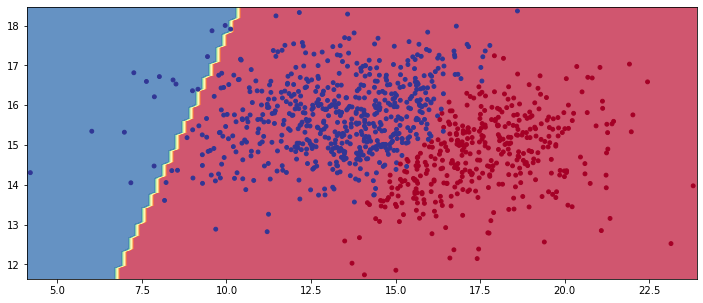

In [195]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))

x_min, x_max = X[:,0].min() -0.1, X[:,0].max() +0.1
y_min, y_max = X[:,1].min() -0.1, X[:,1].max() +0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

x_in = np.c_[xx.ravel(), yy.ravel()]

pred = model.predict(x_in)

pred = np.argmax(pred, axis=1).reshape(xx.shape)


plt.contourf(xx, yy, pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, s=15,cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

